In [1]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (24,5)
import seaborn as sns
sns.set()
sns.set(font_scale=1.75)
import scipy

In [2]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000,  2000000,  3000000,  4000000,  5000000,  6000000,  7000000, 8000000, 9000000,
       10000000, 15000000, 20000000, 25000000]
xticks = [str(float(i)) for i in cols[2:]]
xticks = [i.replace("000000.0", "M") for i in xticks]
xticks = [i.replace("000.0", "k") for i in xticks]
test_labels = {
    'int_insert': "integer insertion", 'int_succ_lookup' : "integer successful lookups",
    'int_nosucc_lookup': "integer unsuccessful lookups", 'int_delete' : "integer deletions",
    'int_iter' : "integer iteration", 'string_insert' : "string insertion", 'string_succ_lookup': "string successful lookups", 
    'string_nosucc_lookup' : "string unsuccessful lookups", 'string_delete': "string deletions", 
    'string_iter' : "string iteration"
}


data = pd.read_csv("results.csv", header=None)
data.columns = cols[:len(data.columns)]
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
    data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)


<ipython-input-2-214bdae56074>:26: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-2-214bdae56074>:26: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-2-214bdae56074>:26: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test",

In [3]:
data.describe()

,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,...,4000000,5000000,6000000,7000000,8000000,9000000,10000000,15000000,20000000,25000000
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,46.050625,79.091250,98.775000,113.968125,123.26875,130.745000,136.880000,142.739375,148.301875,151.028750,...,196.866875,203.561250,208.488750,214.347500,223.823750,226.598125,234.343750,255.766250,272.740000,284.457500
std,36.132451,71.176105,85.854164,95.204665,99.89463,103.949367,107.614363,112.210487,115.449247,116.603117,...,150.726115,154.543387,158.604676,161.982042,169.069984,169.657221,176.403322,189.456443,200.005278,206.009616
min,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,22.000000,29.000000,37.000000,42.00000,45.000000,48.000000,52.000000,54.000000,53.750000,...,68.000000,68.000000,66.000000,67.000000,71.000000,70.000000,72.000000,79.000000,86.000000,94.000000
50%,42.000000,57.000000,73.000000,82.000000,89.00000,96.500000,103.500000,107.000000,117.000000,117.500000,...,162.000000,170.500000,176.000000,184.000000,189.000000,196.000000,202.000000,225.000000,248.000000,263.000000
75%,71.000000,122.000000,146.250000,173.000000,186.00000,198.000000,209.250000,216.000000,226.250000,232.250000,...,305.000000,315.000000,319.000000,325.000000,340.000000,345.250000,353.250000,393.000000,423.250000,441.250000
max,193.000000,313.000000,350.000000,450.000000,474.00000,425.000000,455.000000,433.000000,550.000000,508.000000,...,677.000000,621.000000,759.000000,679.000000,718.000000,704.000000,835.000000,803.000000,1091.000000,949.000000


[' "std::unordered_map"' ' "LP3"']


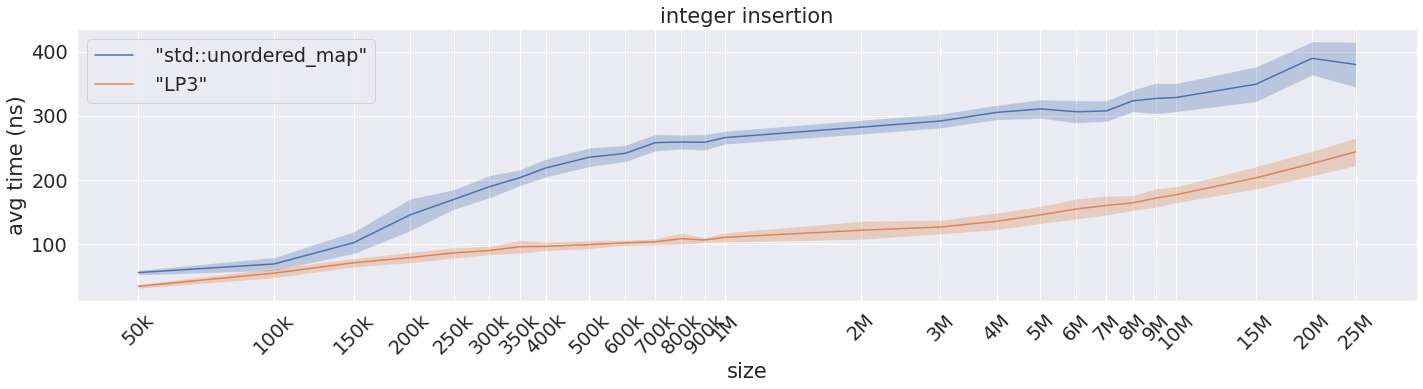

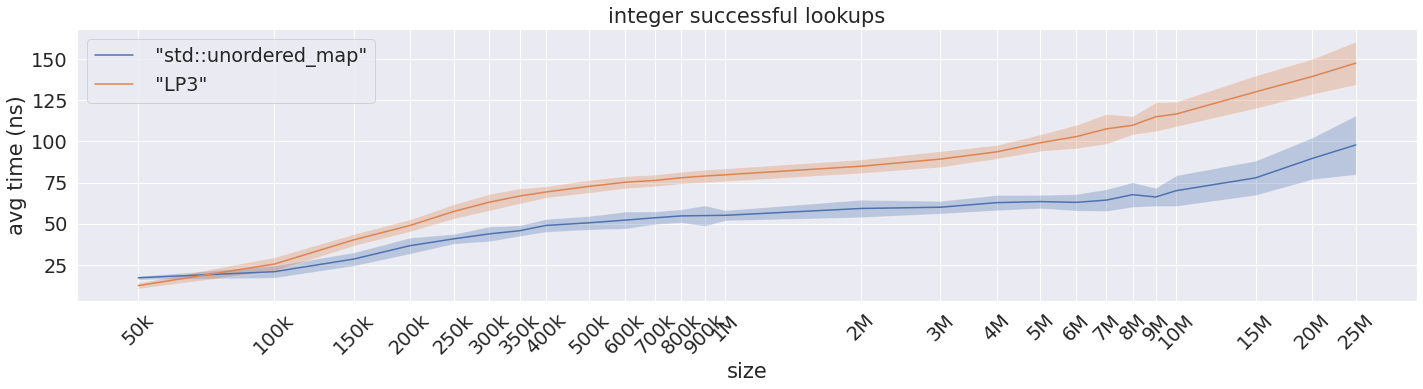

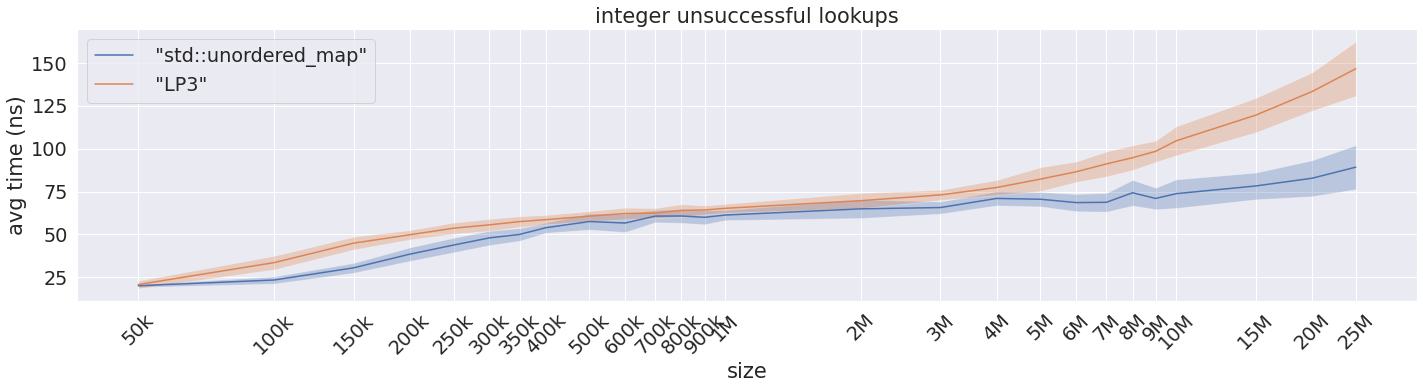

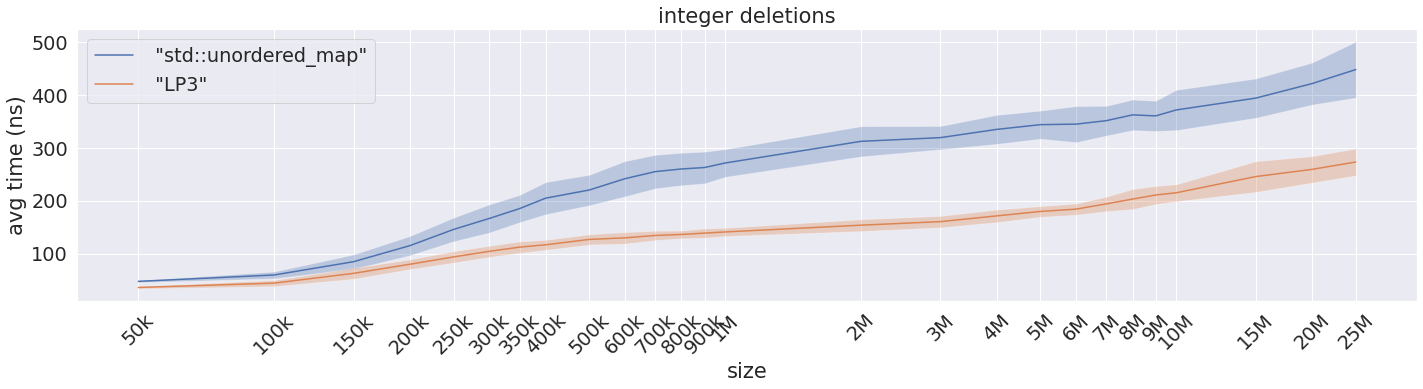

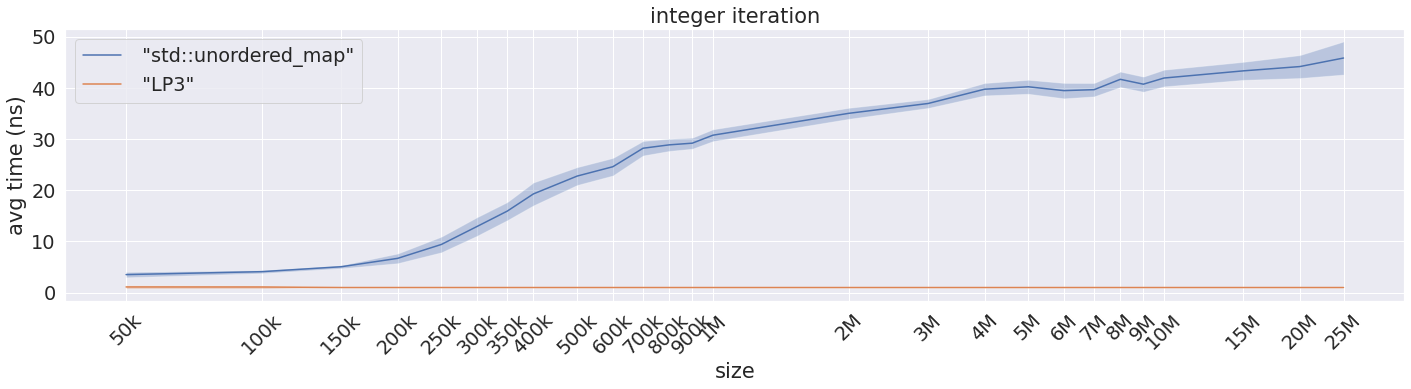

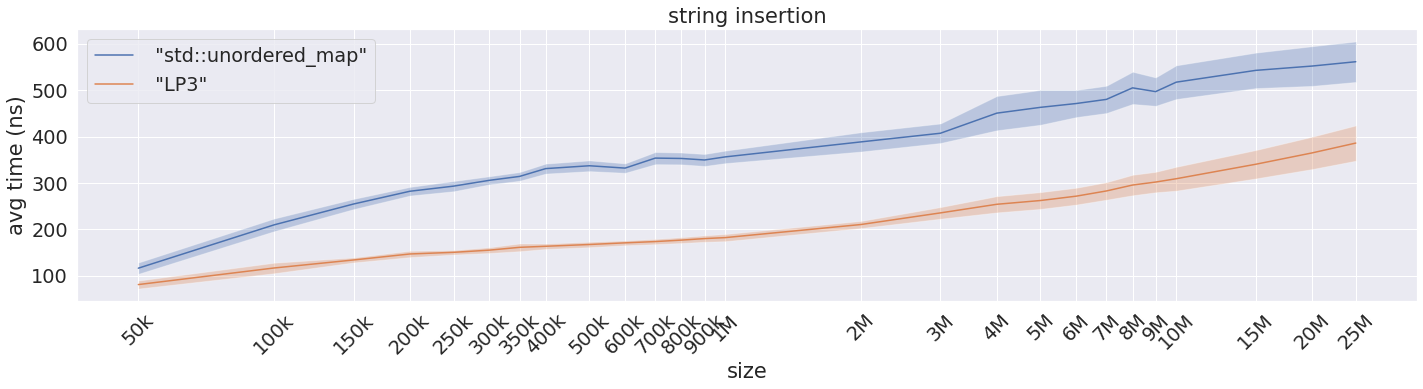

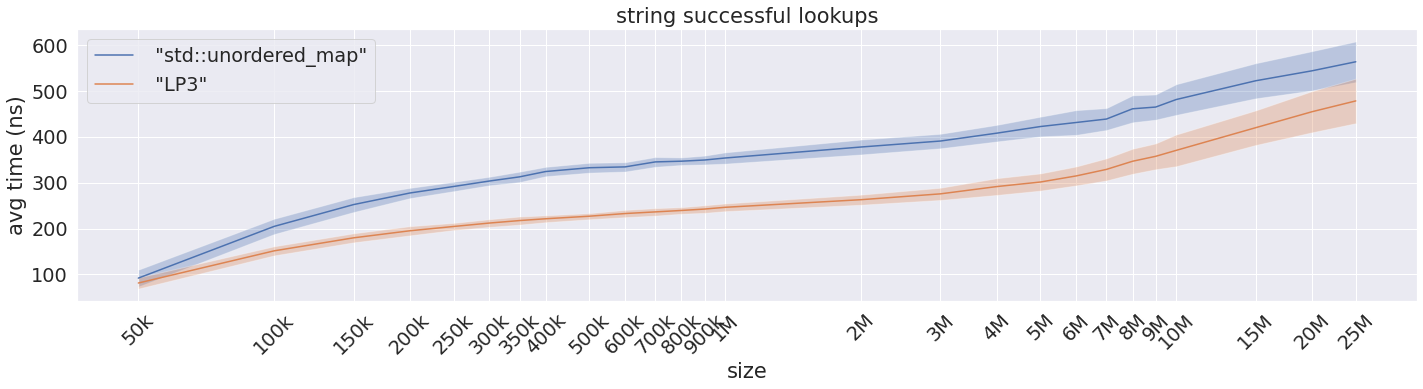

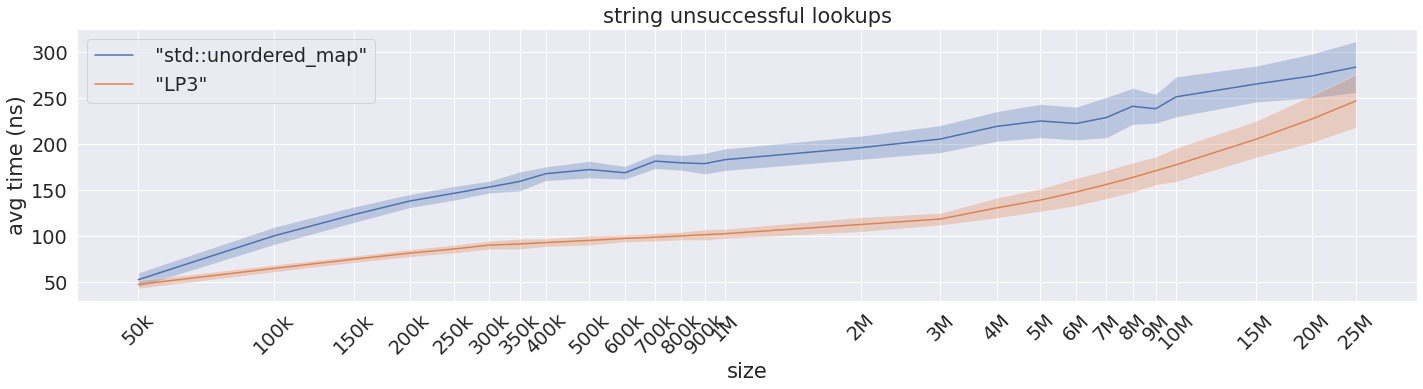

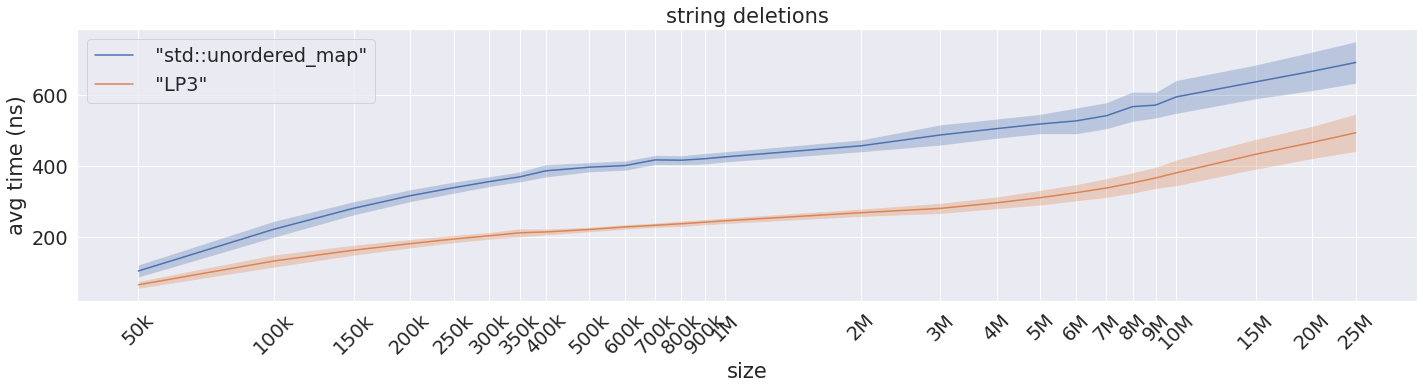

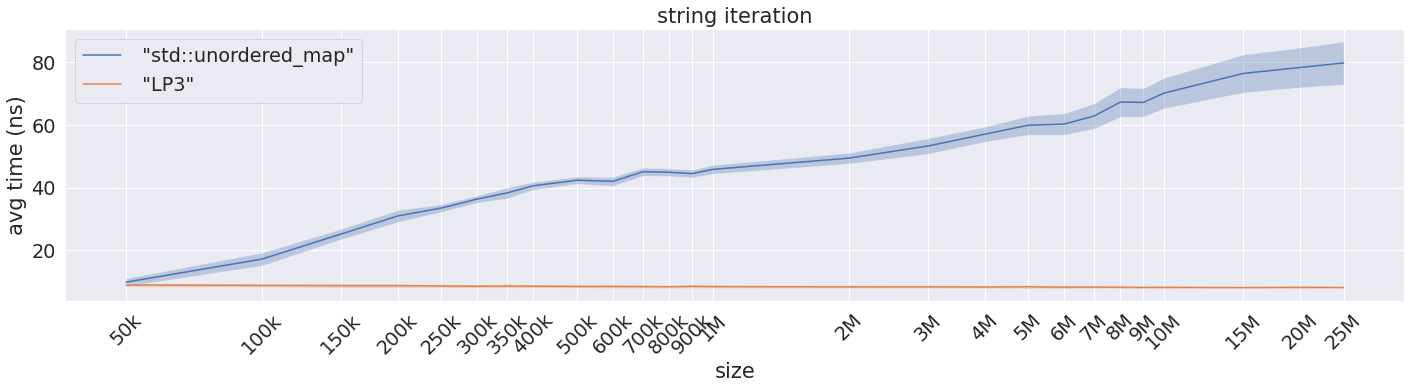

In [4]:
def gen_graph(test):
    for m in maps:
        mdata = data_dict[(test,m)].mean()
        std = data_dict[(test,m)].std()
        sns.lineplot(x=mdata.index, y=mdata, label=m)
        plt.fill_between(cols[2:], mdata - std, mdata +std, alpha=0.3)
    plt.title(test_labels[test])
    plt.xscale("log")
    plt.xticks(cols[2:], xticks, rotation=45)
    plt.xticks(cols[2:])
    plt.xlabel("size")
    plt.ylabel("avg time (ns)")
    plt.show()
    
    
print(maps)
for i in tests:
    gen_graph(i)

In [5]:
# data = pd.read_csv("results_.csv", header=None)
# data.columns = cols[:len(data.columns)]
# tests = data["test"].unique()
# maps = data["map"].unique()
# data_dict = dict()
# for t in tests:
#     for m in maps:
#         data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]   
# for i in tests:
#     gen_graph(i)

FileNotFoundError: [Errno 2] No such file or directory: 'results_.csv'